### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')
images_dir = "images"

In [3]:
data.sample(3)
df=data

2. Investigate the dataset for missing or problematic data.

In [4]:
# Checking for missing entries 
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
df.describe() # more readable
#print(df.describe()) #less readable

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#understanding the object type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df=data
#find total number of duplicate rows
num_duplicates = df.duplicated().sum()
print("Total Number of Duplicate Rows =",num_duplicates, "corresponding to",
      round(100*df.duplicated().sum()/df["Y"].count(),2),"% of duplicate entries.")

## Throw away code for debugging duplicate rows
#duplicates = df.duplicated() # this is boolean so not as readable 
#print(duplicates) #not much insight from above so can

##Code Below will display all the duplicate rows
#duplicate_rows = df[duplicates]
#duplicate_rows


df = df.drop_duplicates(keep='first') 
len(df)
 

Total Number of Duplicate Rows = 74 corresponding to 0.58 % of duplicate entries.


12610

### Checking & validating the attributes of the dataframe to the problem statement description
Examine the unique entries in each column and check if the attributes match to the description provided by the survey team. This can be used rename entries and make dataframe more readable

In [8]:
# Select object columns for validating the data description provided
obj_df = df.select_dtypes(include=['object'])

# Get unique values for all object columns
obj_col_uniques = obj_df.apply(pd.unique)

# Print unique values 
for col, uniques in zip(obj_df, obj_col_uniques):
    print(f"Unique values in columns are '{col}': {uniques}")

Unique values in columns are 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in columns are 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in columns are 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in columns are 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in columns are 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in columns are 'expiration': ['1d' '2h']
Unique values in columns are 'gender': ['Female' 'Male']
Unique values in columns are 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in columns are 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in columns are 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in columns are 'occupation': ['Unemployed' 'Architect

### Data Observation 
There are total of 12684 entries. There are 74 duplicate corresponding to 0.58 % of duplicate entries that can be dropped for subsequent analysis.

The car column have mostly null so can be dropped from the ananlysis. 

The dataframe coloumns have typos (eg Passager), table enteries are not so similar format (eg less1 Vs, 1~8, etc), the columns titles are not very readable, so, table can be reformatted to make more readable. 

Column names can be shortened and error checks can be made to shorten the dataframe based on situ. For example, if opposite direction and same direction have 1's and 0's then they can be merged into one column. Similarly, time to destination can be merged. 

For situational analsyis some information can be dropped even further of be renamed. For example, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 have minimal missing information so can be dropped based on analysis type.   


### Exploratory Data Analysis
High level observation can be made through heat maps.

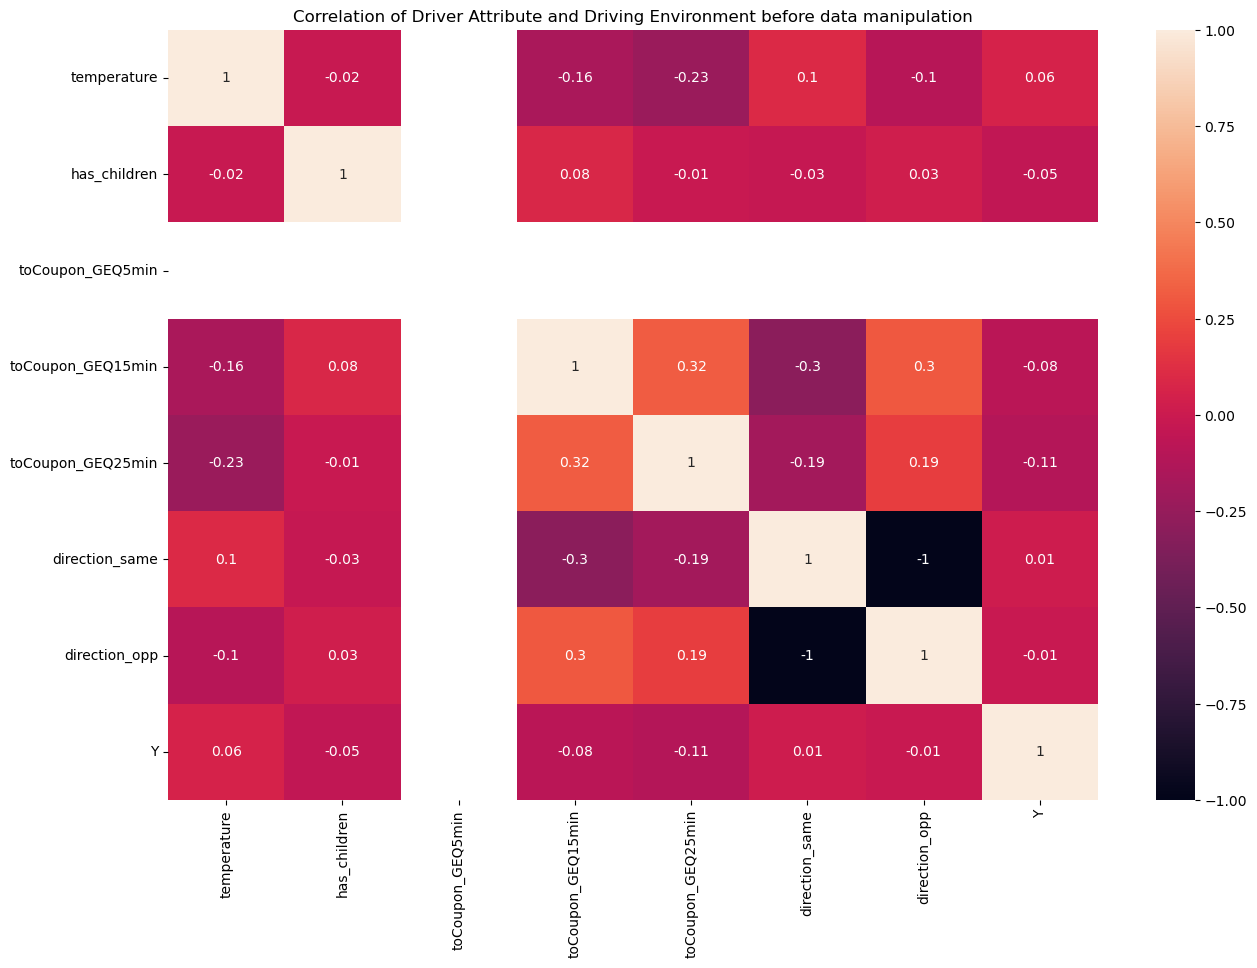

In [9]:
import os
corr = df.corr(numeric_only = True).round(2)
#print(corr)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True);
txt ='Correlation of Driver Attribute and Driving Environment before data manipulation'
plt.title(txt);
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


Unclear to me why there is issue for 5min Coupon was resulting in NaN in correlation matrix. So resolved it by multipling by a very small values in a range near 1, say 0.95 - 0.99. 

#### Throw away code to understand and mitigate the NaN in correlation plot 
Code checks if the 5min, 15min and 25min are uniquely assigned so the correaltion issue for 5min can be resolved. However, it did not work.My guess is that the entries in 5min col. are very similar and we can break this consitency by multiplying randomly by a range of value. Since table has 1 and 0 so this will have minmal impact.

#### Code Starts here
Define the compliance condition 
def compliance_condition(row):
    if row['25min to Coupon Dest'] == 1:
        return row['5min to Coupon Dest'] == 1 and row['15min to Coupon Dest'] == 1
    elif row['15min to Coupon Dest'] == 1:
        return row['5min to Coupon Dest'] == 1 and row['25min to Coupon Dest'] == 0
    else:
        return row['5min to Coupon Dest'] == 1 and row['15min to Coupon Dest'] == 0 and row['25min to Coupon Dest'] == 0

#### Check for compliant rows
compliant = df2.loc[df2.apply(compliance_condition, axis=1), :]
#### Add a new column with compliance status
df2['Compliance'] = df2.apply(compliance_condition, axis=1)


#### Display results
if compliant.empty:
    print("All rows are non-compliant.")
else:
    print("Compliance:")
    #print(compliant)

non_compliant = df2.drop(compliant.index)
print("\nNon-compliance:")
print(non_compliant)

### Checking of data entry uniqueness and subsequent data manipulation
The unique values can be made more readable. Some of the unique values can be converted to numerical for correlation purposes.

3. Decide what to do about your missing data -- drop, replace, other...

Unique values in columns are 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in columns are 'Passenger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in columns are 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in columns are 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in columns are 'gender': ['Female' 'Male']
Unique values in columns are 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in columns are 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in columns are 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathem

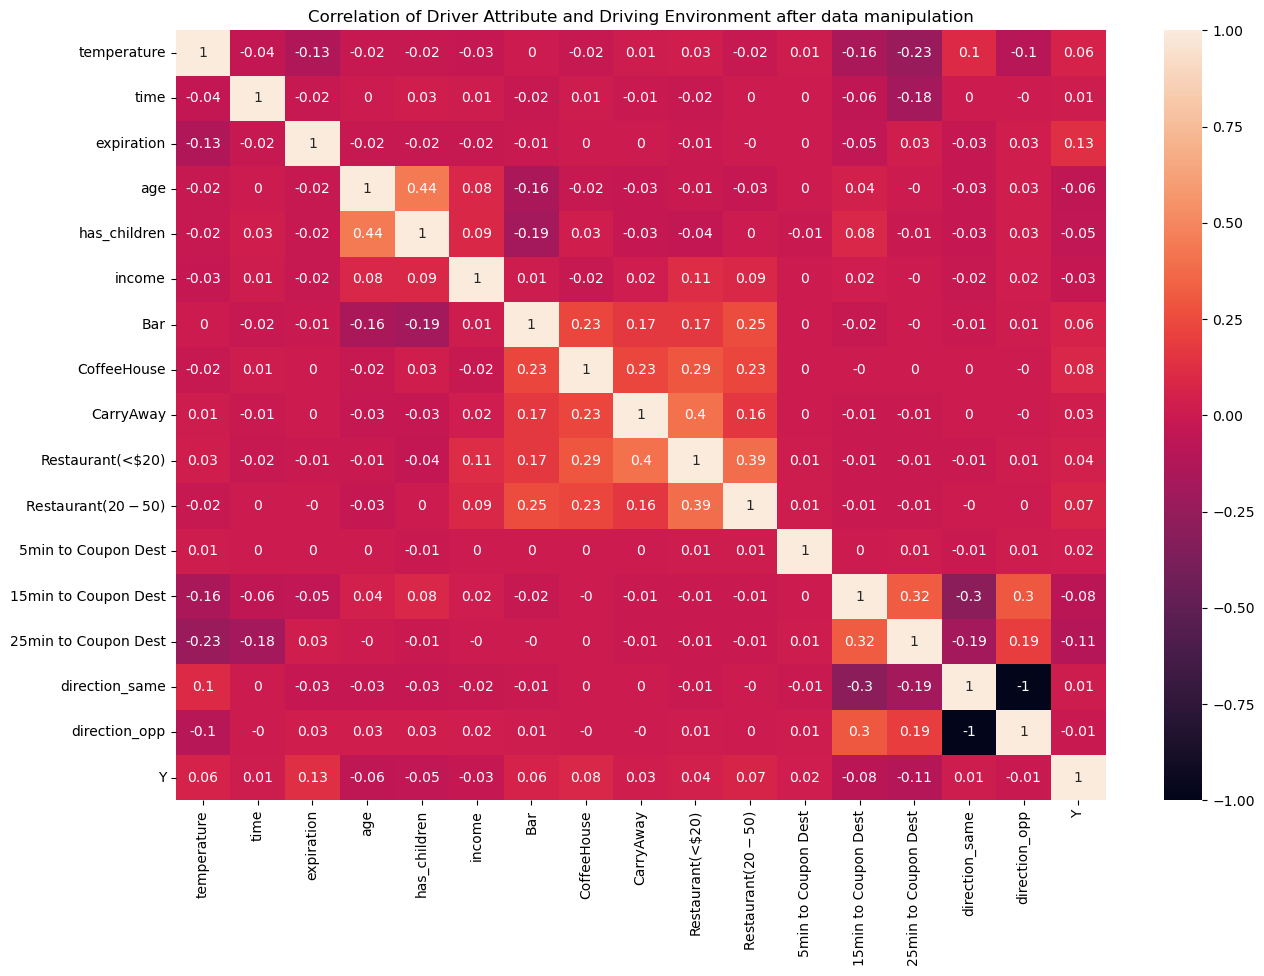

In [10]:
# assign a new dataframe to gather more insights by renaming and editing data 
df2 = df
new_names = {'passanger': 'Passenger',
             'RestaurantLessThan20': 'Restaurant(<$20)','Restaurant20To50': 'Restaurant($20-$50)',
             'toCoupon_GEQ5min': '5min to Coupon Dest', 'toCoupon_GEQ15min':'15min to Coupon Dest',
             'toCoupon_GEQ25min':'25min to Coupon Dest'
             }
# Modify the original DataFrame
df2 = df2.rename(columns=new_names).replace({'never':0,'less1':0.5, '1~3':2, 'gt8':8, '4~8':6,
                                          "1d": 24, "2h":2, # convert expriation time to numerical 
                                          '2PM':14,'10AM':10,'6PM':18,'7AM':7,'10PM':22, # convert time to numeric  
                                            })  

#convert age to numerical. 
#Renaming '50plus' as 51 and 'below21' as 20. These number could be changed based on KDE of age from the survery  
df2 = df2.replace({'50plus': 51,'below21': 20, 
                     '21':21,'46':46, '26':26, '31':31,'41':41,'36':36})  

#Making Income into numerical.  
#convert income entries from object to int format. Data suggests salary bracket is $25k. 
#So replace with mean of the salary expressed as k$ 
df2['income'].value_counts()
df2 = df2.replace({'$37500$49999': 43.75,'$62500$74999': 68.75,
                     '$12500$24999': 18.75,'$75000$87499': 81.25,
                     '$50000$62499': 56.25, '$25000$37499': 31.25,
                     '$100000' : 106.25,'$87500$99999': 93.75,'Lessthan$12500': 12.5})  

df2 = df2.replace({'$37500 - $49999':43.75,'$62500 - $74999':68.75, '$12500 - $24999':18.75,
                   '$75000 - $87499':81.25,'$50000 - $62499':56.25, '$25000 - $37499':31.25,
                   '$100000 or More':106.25,'$87500 - $99999':93.75,'Less than $12500':12.5})

del df2["car"] #dropping car col. since most are NaNs

# Create a new DataFrame with capitalized column names
#capitalized_cols = [col.capitalize() for col in df2.columns]
#df2 = pd.DataFrame(df2.values, columns=capitalized_cols)


# Print unique values  
# Select object columns for validating the data description provided
obj_df2 = df2.select_dtypes(include=['object'])

# Get unique values for all object columns
obj_col_uniques = obj_df2.apply(pd.unique)

for col, uniques in zip(obj_df2, obj_col_uniques):
    print(f"Unique values in columns are '{col}': {uniques}")
    
# Unclear to me why there is issue for 5min Coupon was resulting in NaN in correlation matrix. 
# So resolved it by multipling by a very small values in a range near 1, say 0.95 - 0.99. 
# Define the range of values (inclusive)
multiplier_range = np.random.uniform(low=0.95, high=0.99, size=len(df2))

# Create a DataFrame or Series (if desired) to hold the multipliers
multipliers_df2 = pd.DataFrame({'multiplier': multiplier_range})

# Element-wise multiplication using broadcasting
df2['5min to Coupon Dest'] = df2['5min to Coupon Dest'] * multipliers_df2['multiplier']


corr2 = df2.corr(numeric_only = True).round(2)
#print(corr)
plt.figure(figsize = (15,10))
sns.heatmap(corr2, annot = True);
txt ='Correlation of Driver Attribute and Driving Environment after data manipulation'
plt.title(txt);
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


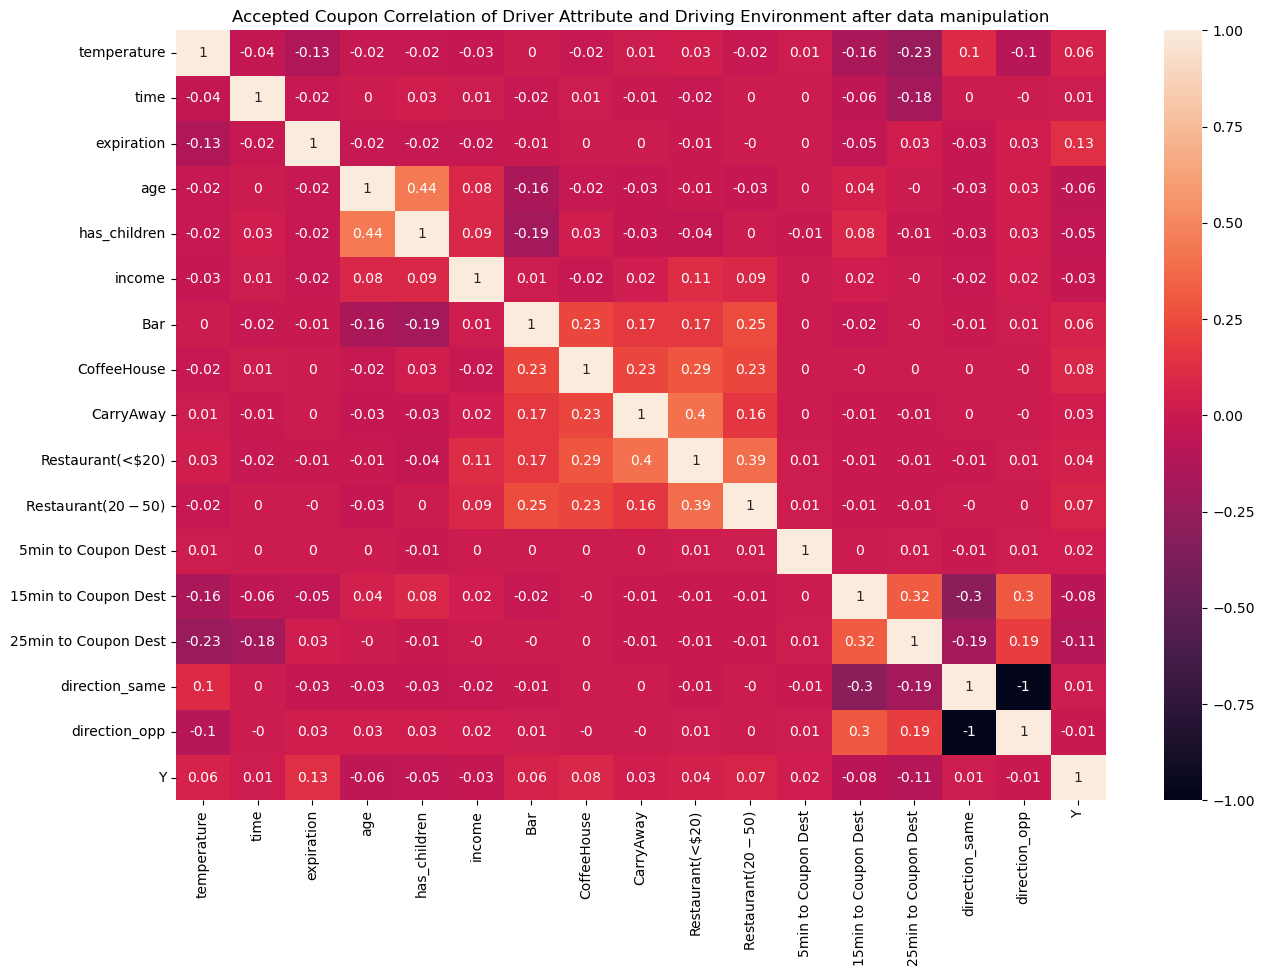

In [11]:
condition = df2['Y'] == 1
filtered_df2 = df2[df2['Y'] == 1]
filtered_df2.corr(numeric_only = True).round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr2, annot = True);
txt ='Accepted Coupon Correlation of Driver Attribute and Driving Environment after data manipulation'
plt.title(txt);
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

# relatively strong correlation based on lifetyle and coupon accepted. ie. center of the correlation plot

4. What proportion of the total observations chose to accept the coupon? 

In [12]:
#print('Percent of the Observers accepting the Coupon is %.2f%%' %((df['Y'].sum()/len(df['Y']))*100))
print(f"Of the {len(df['Y'])} observers {df['Y'].sum()/len(df['Y']) * 100:.2f}% accepted the coupons")

Of the 12610 observers 56.76% accepted the coupons


5. Use a bar plot to visualize the `coupon` column.

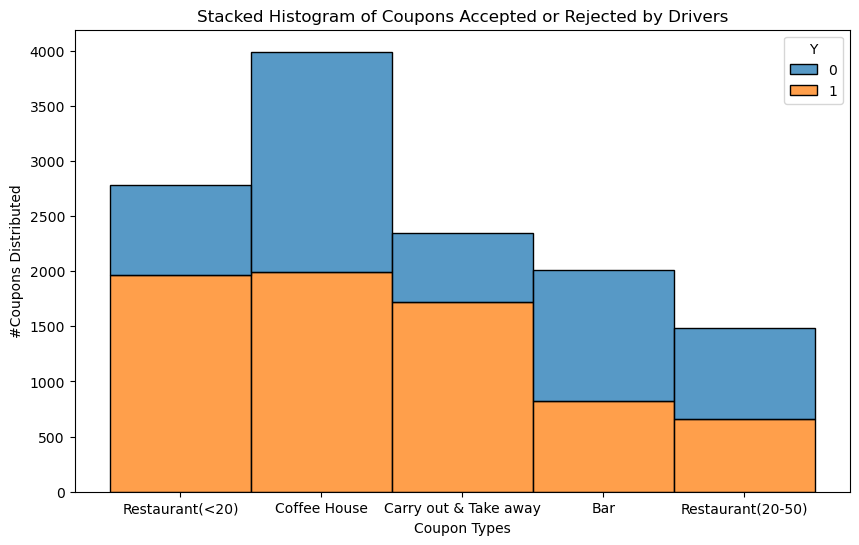

In [13]:
capitalized_cols = [col.capitalize() for col in df2.columns]
df = pd.DataFrame(df2.values, columns=capitalized_cols)
 
fig, ax = plt.subplots(figsize=(10, 6))
#sns.barplot(x='Coupon', y='count', data=df.groupby('Coupon').size().to_frame('count').reset_index(), ax=ax)
sns.histplot(data=df, x='Coupon', hue='Y',multiple='stack')
txt ='Stacked Histogram of Coupons Accepted or Rejected by Drivers'
plt.title(txt)
plt.xlabel('Coupon Types')
plt.ylabel('#Coupons Distributed')


file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


While the total number of accepted coupons for Coffee house and <$20 resturant coupons, but when expressed as a percent of the total coupon disemintated, the drivers preferred <$20 resturant coupon. Percentage wise, coupon acceptance rate is decreases from 

6. Use a histogram to visualize the temperature column.



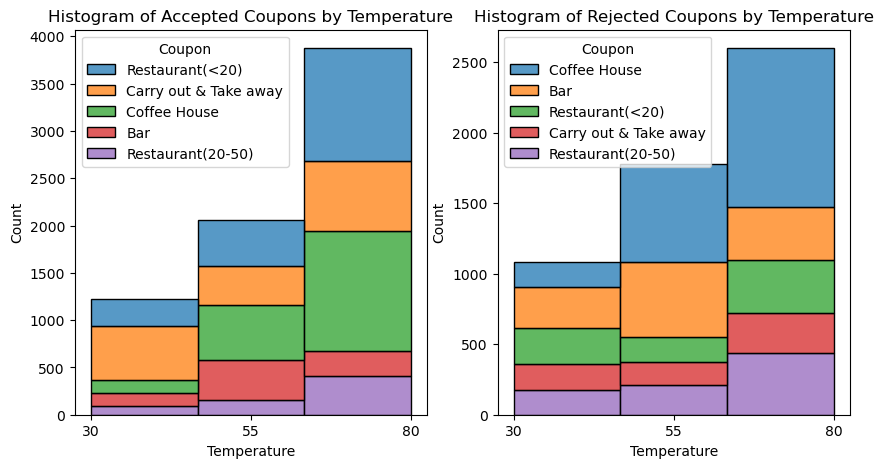

In [14]:
# Create a figure and subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
# Generate and set x-ticks and labels on the first subplot
xticks = [30, 55, 80]
ax1.set_xticks(xticks)

sns.histplot(
    data=df.query("Y==1"), x='Temperature', hue='Coupon', multiple='stack', 
    bins=3,  # Adjust bins to control the number of bars in the histogram
    stat='count',  # Count occurrences instead of density
    ax=ax1)
ax1.set_title('Histogram of Accepted Coupons by Temperature')
plt.xticks([30, 55, 80])  # Set specific x-axis ticks 

sns.histplot(
    data=df.query("Y==0"), x='Temperature', hue='Coupon', multiple='stack', 
    bins=3,  # Adjust bins to control the number of bars in the histogram
    stat='count',  # Count occurrences instead of density
    ax=ax2)
ax2.set_title('Histogram of Rejected Coupons by Temperature')
#plt.xticks([30, 55, 80])  # Set specific x-axis ticks 
#plt.tight_layout()

txt ='Histogram of Coupon Type by Temperature'
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

Amongst the various coupons, the drivers accepted <$20 resturant coupon the most irrespective of the temperature of the day. Particularly, higher coupons accepted during warmer days. In colder weather, take away coupons dominated. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_df = df[df['Coupon'] == 'Bar']
bar_df.sample(3) # testing by random sample of entries 

,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Coffeehouse,Carryaway,Restaurant(<$20),Restaurant($20-$50),5min to coupon dest,15min to coupon dest,25min to coupon dest,Direction_same,Direction_opp,Y
3791,Home,Alone,Sunny,55,18,Bar,24,Female,26,Single,...,2.0,2.0,2.0,0.5,0.984346,0,0,1,0,1
11991,No Urgent Place,Kid(s),Snowy,30,18,Bar,24,Female,46,Married partner,...,6.0,6.0,2.0,NaN,0.961076,0,0,0,1,0
1532,No Urgent Place,Kid(s),Sunny,80,10,Bar,24,Female,36,Married partner,...,2.0,2.0,0.5,0.5,0.969387,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [16]:
print(f"Of the {len(bar_df['Y'])} observers who were given bar coupons {bar_df['Y'].sum()/len(bar_df['Y']) * 100:.2f}% accepted the coupons")
print("But some of the Bar coupons are NaNs so we will ignore them from our analysis")
bar_df.isnull().sum()
bar_df = bar_df.dropna(subset=["Bar"])
print(f"Now Of the {len(bar_df['Y'])} observers who were given bar coupons {bar_df['Y'].sum()/len(bar_df['Y']) * 100:.2f}% accepted the coupons")

Of the 2010 observers who were given bar coupons 41.00% accepted the coupons
But some of the Bar coupons are NaNs so we will ignore them from our analysis
Now Of the 1989 observers who were given bar coupons 41.03% accepted the coupons


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# per previous assumption: 0, 0.5, 2.0, 6 and 8 corresponds to survey results of Never, <1, 1-3,
# 4-8, and >8 respectively.  

print("Acceptance rate based on all bar coupons allotment:")
tmp= round((100*bar_df.query("Y ==1")['Bar'].value_counts()/len(bar_df)) ,2)
print(tmp)
print("Acceptance rate for users that went to a bar <3 times a month based on all bar coupons allotment is",
      (tmp.iloc[0]+tmp.iloc[1]+tmp.iloc[2]),"%. Constrast against", tmp.iloc[3]+tmp.iloc[4],"% who went more than thrice.")

Acceptance rate based on all bar coupons allotment:
Bar
2.0    12.92
0.5    12.57
0.0     7.84
6.0     5.88
8.0     1.81
Name: count, dtype: float64
Acceptance rate for users that went to a bar <3 times a month based on all bar coupons allotment is 33.33 %. Constrast against 7.6899999999999995 % who went more than thrice.


In [18]:
print('Unique Categories of user bar visits per month:', bar_df.Bar.unique())
print('Assume Bar Categories with index "0" or "<1" or "1~3" consistute to 3 or fewer bar visits.',
      '\nOther categories are > 3 bar visits per month')
bar_df
tmp1 = bar_df.query('Bar == 0  or Bar == 0.5 or  Bar == 2')['Y'].agg(['count','sum'])
tmp2 = bar_df.query('Bar == 8  or Bar == 6')['Y'].agg(['count','sum'])
tmp_df = pd.DataFrame({'<=3 Bar Visits':tmp1,'>3 Bar Visits':tmp2})
tmp_df = tmp_df.transpose()
tmp_df['% Coupon Accepted'] = 100*tmp_df['sum']/tmp_df['count'] 
tmp_df['% Coupon Accepted'] = tmp_df['% Coupon Accepted'].apply(lambda x: round(x, 2))
tmp_df=tmp_df.reset_index() 

# Print the acceptance rates
tmp_df = tmp_df.rename(columns= {'count':'#Coupons Shared','sum':'#Coupons Planned Useage'})
print('\nListed below is the coupon acceptance statistics')
#print('\n',tmp_df)

tmp_df['% Coupon Not Accepted'] = 100 - tmp_df['% Coupon Accepted']
tmp_df = tmp_df.rename(columns= {'index':'#Bar Visits'})
tmp_df
print("When considering the lifestyle of the drivers by comparing how often they visit the bar",
      "the acceptance rate increases to 37% and 77% for drivers that go to the bar fewer than or more than 3 times a month to the bar.")


Unique Categories of user bar visits per month: [0.0 0.5 2.0 8.0 6.0]
Assume Bar Categories with index "0" or "<1" or "1~3" consistute to 3 or fewer bar visits. 
Other categories are > 3 bar visits per month

Listed below is the coupon acceptance statistics
When considering the lifestyle of the drivers by comparing how often they visit the bar the acceptance rate increases to 37% and 77% for drivers that go to the bar fewer than or more than 3 times a month to the bar.


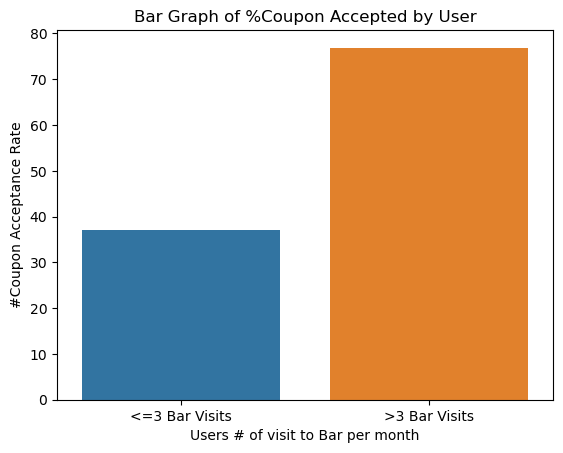

In [19]:
# Create a bar chart
sns.barplot(x="#Bar Visits",y="% Coupon Accepted",data=tmp_df)

# Customize the plot (optional)
txt='Bar Graph of %Coupon Accepted by User'
plt.title(txt)
plt.xlabel('Users # of visit to Bar per month')
plt.ylabel('#Coupon Acceptance Rate')

file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

In [20]:
tmp3 = bar_df.query('Bar == 0.5 or  Bar == 2')['Y'].agg(['count','sum'])
print('\n If we ignore the drivers that visit the bar fewer than 3 times a month and have never been to the bar before then the acceptance rate',
     'increases to',round(100*tmp3.iloc[1]/tmp3.iloc[0],2) ,'%')


 If we ignore the drivers that visit the bar fewer than 3 times a month and have never been to the bar before then the acceptance rate increases to 52.81 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
bar_df = df[df['Coupon'] == 'Bar']
#drop NaN number
bar_df = bar_df.dropna(subset=["Bar"])
print('Unique Categories of age are:', bar_df.Age.unique())
#using a threshold value convert Object Age type to int so it can be used in query function
threshold=25;
bar_df['Age'] = bar_df['Age'].replace({'50+': threshold+1, '<21':20,
                                       '21':threshold-1, '46':threshold+1,
                                       '26':threshold+1, '31':threshold+1,
                                       '41':threshold+1, 50:threshold+1, '36':threshold+1})
print('Modified Unique Categories of age are:', bar_df.Age.unique())

#dataframe of age. tells you how many users by age group
age_df = bar_df.groupby("Age").agg(sum)
#age_df

Unique Categories of age are: [21 46 26 31 41 51 36 20]
Modified Unique Categories of age are: [21 46 26 31 41 51 36 20]


In [22]:
#using a threshold value convert Object Age type to int so it can be used in query function
threshold=25;
bar_df['Age'] = bar_df['Age'].replace({'50+': threshold+1, '<21':20,
                                       '21':threshold-1, '46':threshold+1,
                                       '26':threshold+1, '31':threshold+1,
                                       '41':threshold+1, 50:threshold+1, '36':threshold+1})
print('Modified Unique Categories of age are:', bar_df.Age.unique())


# Age Calcuations 
#tmp1 = bar_df.query('Age <21')['Y'].agg(['count','sum'])
#tmp2 = bar_df.query('Age >21 and Age<25')['Y'].agg(['count','sum'])
#tmp3 = bar_df.query('Age >25')['Y'].agg(['count','sum'])
#sanity check that all entires roll up to total number of entries 
#tmp4 = bar_df.query('Age >25 or Age <21 or (Age >21 and Age<25) ')[['Y']].agg(['count','sum'])
#print(tmp1, tmp2, tmp3, tmp4)

# drivers that go to the bar more than once a month and are over the age of 25
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age >25')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar more than once a month and',
      'are over the age of 25 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')
# drivers that go to the bar more than once a month and are between the age of 21 - 25
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age <25 and Age >21')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar more than once a month and',
      'are between the age of 21 - 25 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')
# drivers that go to the bar more than once a month and are under the age of 21
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age <25')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar more than once a month and',
      'are under the age of 21 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')

# drivers that go to the bar less than once a month and are over the age of 25
tmp1 = bar_df.query('Bar == 0 or Bar == 0.5 and Age >25')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar less than once a month and',
      'are over the age of 25 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')
# drivers that go to the bar less than once a month and are between the age of 21 - 25
tmp1 = bar_df.query('Bar == 0 or Bar == 0.5 and Age <25 and Age >21')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar less than once a month and',
      'are between the age 21 - 25 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')
# drivers that go to the bar less than once a month and are under the age of 21
tmp1 = bar_df.query('Bar == 0 or Bar == 0.5 and Age <21')['Y'].agg(['count','sum'])
print('\nAcceptance rate of the drivers that go to the bar more than once a month and',
      'are under the age of 21 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')

print("Summary: Profiling the driver over the age of 25 and within the age 21 – 25 with lifestyle involving visiting bar at least once a month have comparable acceptance rate of 71% and ~77% respectively. Acceptance rate of the drivers that go to the bar less than once a month tend to be lower than 20%")
 

Modified Unique Categories of age are: [21 46 26 31 41 51 36 20]

Acceptance rate of the drivers that go to the bar more than once a month and are over the age of 25 is 70.39 %

Acceptance rate of the drivers that go to the bar more than once a month and are between the age of 21 - 25 is 76.88 %

Acceptance rate of the drivers that go to the bar more than once a month and are under the age of 21 is 71.47 %

Acceptance rate of the drivers that go to the bar less than once a month and are over the age of 25 is 26.39 %

Acceptance rate of the drivers that go to the bar less than once a month and are between the age 21 - 25 is 18.8 %

Acceptance rate of the drivers that go to the bar more than once a month and are under the age of 21 is 19.24 %
Summary: Profiling the driver over the age of 25 and within the age 21 – 25 with lifestyle involving visiting bar at least once a month have comparable acceptance rate of 71% and ~77% respectively. Acceptance rate of the drivers that go to the bar l

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
#print('Unique Categories of Occupation are:', bar_df.Occupation.unique())

#excluding "Farming Fishing & Forestry Occpation" category
excluded_category = "Farming Fishing & Forestry"
bar_df =bar_df[bar_df['Occupation'] != excluded_category]
#print('Unique Categories of Occupation are:', bar_df2.Occupation.unique())

# drivers that go to the bar more than once a month and are over the age of 25
tmp2 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Passenger != "Kid(s)" ')['Y'].agg(['count','sum'])
print('\nThe acceptance rate between drivers who go to bars more than once a month and had passengers',
      'that were not a kid and had occupations other than farming, fishing, or forestry is',round(100*tmp2.iloc[1]/tmp2.iloc[0],2),'%')
 



The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71.2 %


In [24]:
tmp_df = pd.DataFrame({'Kid(s)':tmp2,'Other':tmp1})
tmp_df = tmp_df.transpose()
tmp_df['% Coupon Accepted'] = 100*tmp_df['sum']/tmp_df['count'] 
tmp_df['% Coupon Accepted'] = tmp_df['% Coupon Accepted'].apply(lambda x: round(x, 2))
tmp_df=tmp_df.reset_index() 

# Print the acceptance rates
tmp_df = tmp_df.rename(columns= {'count':'#Coupons Shared','sum':'#Coupons Planned Useage'})
print('\nListed below is the coupon acceptance statistics')
#print('\n',tmp_df)

tmp_df['% Coupon Not Accepted'] = 100 - tmp_df['% Coupon Accepted']
tmp_df = tmp_df.rename(columns= {'index':'Passenger'})
tmp_df



Listed below is the coupon acceptance statistics


,Passenger,#Coupons Shared,#Coupons Planned Useage,% Coupon Accepted,% Coupon Not Accepted
0,Kid(s),559,398,71.20,28.80
1,Other,842,162,19.24,80.76


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [25]:
print('Unique Categories of Bar are:', bar_df.Bar.unique())
print('Unique Categories of Maritalstatus are:', bar_df.Maritalstatus.unique())
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Passenger != "Kid(s)" and Maritalstatus != "Widowed" ')['Y'].agg(['count','sum'])
print('\nThe acceptance rate of drivers that go to bars more than once a month,',
      ' had passengers that were not a kid, and were not widowed is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')


Unique Categories of Bar are: [0.0 0.5 2.0 8.0 6.0]
Unique Categories of Maritalstatus are: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

The acceptance rate of drivers that go to bars more than once a month,  had passengers that were not a kid, and were not widowed is 71.2 %


Modified Categories of age are: [21 46 26 31 41 51 36 20]
Unique Categories of age are: [21 46 26 31 41 51 36 20]

The acceptance rate of drivers that go to bars more than once a month,  are under the age of 30 is 70.03 %


Text(0, 0.5, '#Coupons Granted')

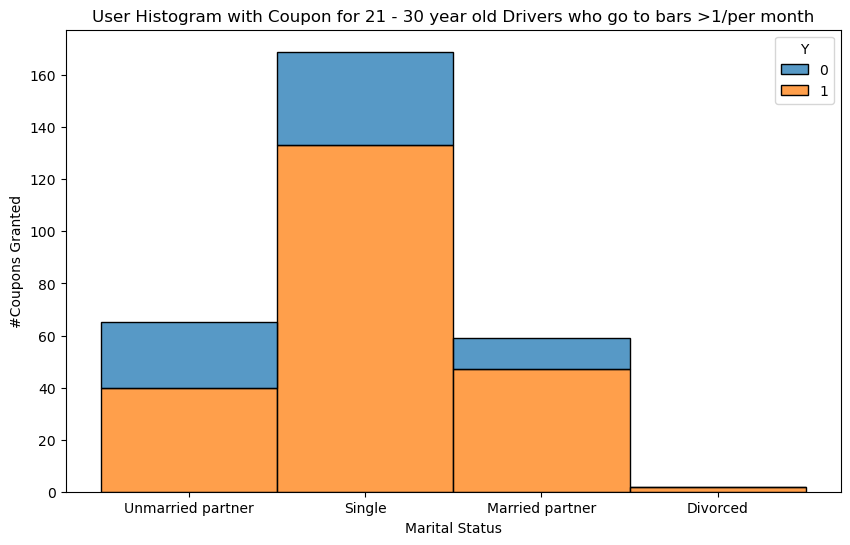

In [26]:
bar_df = df[df['Coupon'] == 'Bar']
bar_df = bar_df.dropna(subset=["Bar"])
print('Modified Categories of age are:', bar_df.Age.unique()) 
bar_df['Age'] = bar_df['Age'].replace({'50+': 51, '<21':20,
                                       '21':21, '46':46,
                                       '26':26, '31':31,
                                       '41':41, '50':50, '36':36})
print('Unique Categories of age are:', bar_df.Age.unique())

tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age >30 ')['Y'].agg(['count','sum'])
print('\nThe acceptance rate of drivers that go to bars more than once a month,',
      ' are under the age of 30 is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')

 
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age <30 and Age >21 ')
fig, ax = plt.subplots(figsize=(10, 6))  
sns.histplot(data=tmp1,x='Maritalstatus', hue='Y', multiple='stack', # Stack bars on top of each other
    bins=3,  # Adjust bins to control the number of bars in the histogram
    stat='count',  # Count occurrences instead of density
   );

# Customize the plot (optional)
txt = 'User Histogram with Coupon for 21 - 30 year old Drivers who go to bars >1/per month'
plt.title(txt)
plt.xlabel('Marital Status')
plt.ylabel('#Coupons Granted')
 


Text(0, 0.5, '#Coupons Granted')

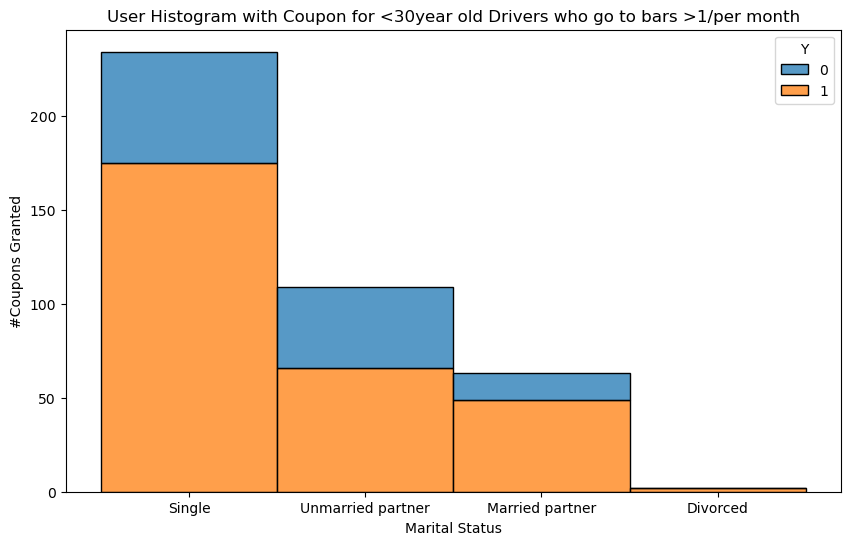

In [27]:
tmp1 = bar_df.query('Bar == 8 or Bar == 6 or  Bar == 2 and Age <30 ')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=tmp1,
    x='Maritalstatus',
    hue='Y',
    multiple='stack', # Stack bars on top of each other
    bins=3,  # Adjust bins to control the number of bars in the histogram
    stat='count',  # Count occurrences instead of density
     
)

# Customize the plot (optional)
txt = 'User Histogram with Coupon for <30year old Drivers who go to bars >1/per month'
plt.title(txt)
plt.xlabel('Marital Status')
plt.ylabel('#Coupons Granted')
 

Unique Categories of Income are: [43.75 68.75 18.75 81.25 56.25 31.25 106.25 93.75 12.5]
Index(['Destination', 'Passenger', 'Weather', 'Temperature', 'Time', 'Coupon',
       'Expiration', 'Gender', 'Age', 'Maritalstatus', 'Has_children',
       'Education', 'Occupation', 'Income', 'Bar', 'Coffeehouse', 'Carryaway',
       'Cheap_restaurant', 'Restaurant($20-$50)', '5min to coupon dest',
       '15min to coupon dest', '25min to coupon dest', 'Direction_same',
       'Direction_opp', 'Y'],
      dtype='object')
Unique Categories of Cheap_Restuarant are: [6.0 2.0 0.5 8.0 nan 0.0]
Unique Categories of Cheap_Restuarant are: [6.  2.  0.5 8.  0. ]
<class 'pandas.core.series.Series'>

The acceptance rate of drivers that go to cheap restaurants more than 4 times a month and with income <50K is 45.72 %


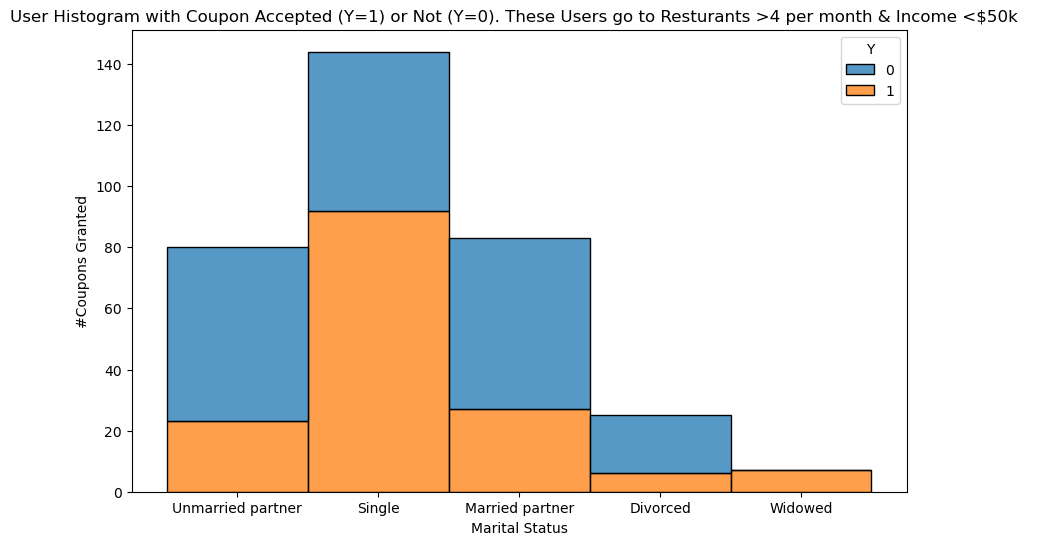

In [28]:
#Compare the acceptance rates between those drivers who:
#go to cheap restaurants more than 4 times a month and income is less than 50K. 

#converting income into int format. 
#Arbitarily assigning >50, say 60 for salary bracket >50k salary.
#Arbitarily assigning <50, say 40 for salary bracket >50k salary.

bar_df =bar_df.rename(columns= {"Restaurant(<$20)":'Cheap_restaurant'})
print('Unique Categories of Income are:', bar_df.Income.unique())
print(bar_df.columns)
print('Unique Categories of Cheap_Restuarant are:', bar_df.Cheap_restaurant.unique())

#converting resturant visits to int format. 
#Assign 0 if <4 else 5
bar_df['Cheap_restaurant'] = bar_df['Cheap_restaurant'].replace({'4~8':5, '1~3':0,'<1':0, '>8':5, '0':0})
bar_df = bar_df.dropna(subset=["Cheap_restaurant"])
print('Unique Categories of Cheap_Restuarant are:', bar_df.Cheap_restaurant.unique())


tmp1 = bar_df.query('Cheap_restaurant > 4 and Income <50 ')['Y'].agg(['count','sum'])
print(type(tmp1))
print('\nThe acceptance rate of drivers that go to cheap restaurants more than 4 times a month',
      'and with income <50K is',round(100*tmp1.iloc[1]/tmp1.iloc[0],2),'%')

tmp1 = bar_df.query('Cheap_restaurant > 4 and Income <50 ') 
fig, ax = plt.subplots(figsize=(10, 6))
#sns.histplot(data=df, x='Temperature')
sns.histplot(
    data=tmp1,
    x='Maritalstatus',
    hue='Y',
    multiple='stack', # Stack bars on top of each other
    bins=3,  # Adjust bins to control the number of bars in the histogram
    stat='count',  # Count occurrences instead of density
     
)

# Customize the plot  
plt.title('User Histogram with Coupon Accepted (Y=1) or Not (Y=0). These Users go to Resturants >4 per month & Income <$50k  ')
plt.xlabel('Marital Status')
plt.ylabel('#Coupons Granted')
plt.show() 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

These results suggest that bar visitation frequency and lifestyle (including age to some extent) are the most prominent factors influencing drivers' acceptance of bar coupons. Targeting drivers who visit bars frequently, regardless of their age (as long as they are above 21), seems like a promising strategy. However, further investigation into other factors like income, occupation, and passenger demographics might be necessary to refine the target audience for bar coupon promotions.

Based on the data explored, potential hypotheses about drivers who are more likely to accept bar coupons are as follows:

1. Bar visitation frequency:

Drivers who visit bars more frequently (more than 3 times a month) are more likely to accept bar coupons compared to those who visit less frequently (less than 3 times a month). This suggests that habitual bar-goers are a good target audience for bar coupon promotions. In partcular opportunity exists to attract unserved 23% habitual drinkers who go to the bar >3 times a month and around 50% for drivers who go to the bar <3 times a month.  

2. Age and lifestyle:

Drivers over 25 years old and those between 21-25 years old who visit bars at least once a month have comparable and high acceptance rates (71% - 77%) for bar coupons. This suggests that age may not be a significant factor as long as drivers have a bar-going lifestyle. Drivers who visit bars less (<20%) than once a month tend to have a lower acceptance rate for bar coupons, regardless of age. 

3. Passenger demographics:

The acceptance rate for drivers who visit bars more than once a month and have non-kid passengers and non-farming/fishing/forestry occupations is high (71.2%). This suggests these passenger demographics might not significantly influence coupon acceptance.Similarly, the acceptance rate for drivers who visit bars more than once a month, have non-kid passengers, and are not widowed is also high (71.2%). This further suggests that marital status might not be a major factor either.

4. Additional factors:

Drivers who visit bars more than once a month and are under 30 years old have a slightly lower acceptance rate (70.03%) compared to other age groups with similar bar-going habits. This suggests age might play a role for a specific younger demographic.
Drivers who visit cheap restaurants frequently (more than 4 times a month) and have an income below $50,000 have a relatively low acceptance rate (45.72%). This suggests these factors might be associated with a lower propensity to spend at bars even with coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [29]:
print("Percentage of Passenger type:\n",100*df['Passenger'].value_counts() / len(df))
#sns.histplot(data=df, hue='Gender', x='Passenger', multiple='stack') # for entire population 

Percentage of Passenger type:
 Passenger
Alone        57.478192
Friend(s)    26.106265
Partner       8.477399
Kid(s)        7.938144
Name: count, dtype: float64


### Insights
On average, ~57% of the drivers were driving alone, followed by 26% with friends and ~ 8% with partners and kids

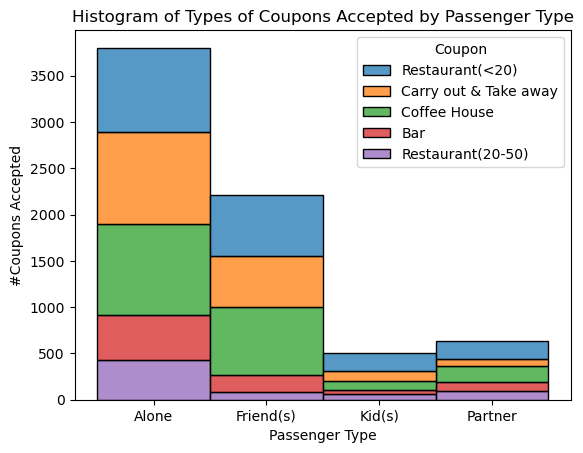

In [30]:
#Type of Coupons Accepted (Y=1) by drivers by Passengers type

sns.histplot(data=df.query("Y==1"), hue='Coupon', x='Passenger', multiple='stack', stat='count') # for drivers that accepted coupon
# Customize the plot  
plt.title("Histogram of Types of Coupons Accepted by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel('#Coupons Accepted')
plt.show() 

#### insights
#Drivers who were alone accepted most number of coupons 
#In particular, for all cateogries cheaper resturants coupons were well accepted 

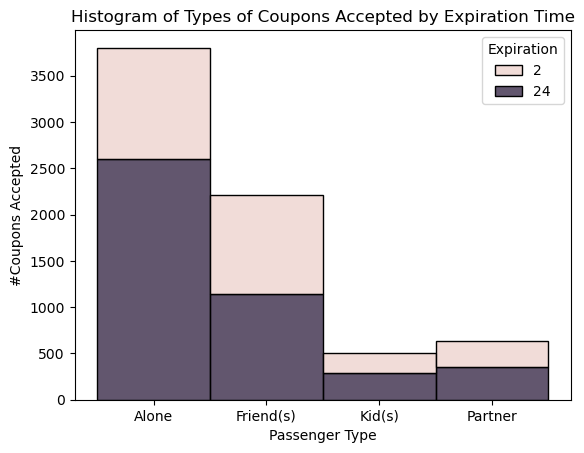

In [31]:
#Coupons Accepted (Y=1) by drivers without/with Passengers categories
sns.histplot(data=df.query("Y==1"),hue='Expiration', x='Passenger',multiple='stack',stat='count')


txt="Histogram of Types of Coupons Accepted by Expiration Time"
plt.title(txt)
plt.xlabel("Passenger Type")
plt.ylabel('#Coupons Accepted')
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

#insight: Almost 50% of the coupons were used within 2 hours when driver had some passenger company and were not alone. 

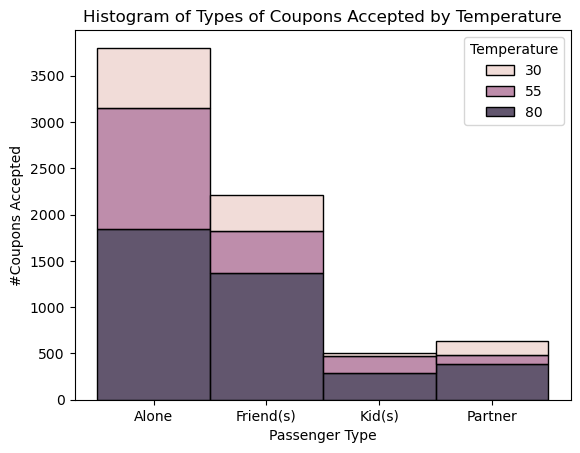

In [32]:
#Coupons Accepted (Y=1) by drivers without/with Passengers categories
sns.histplot(data=df.query("Y==1"),hue='Temperature', x='Passenger',multiple='stack',stat='count')

# Customize the plot  
txt = "Histogram of Types of Coupons Accepted by Temperature"
plt.title(txt)
plt.xlabel("Passenger Type")
plt.ylabel('#Coupons Accepted')

file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

# Insight: more coupon acceptance in warmer weather

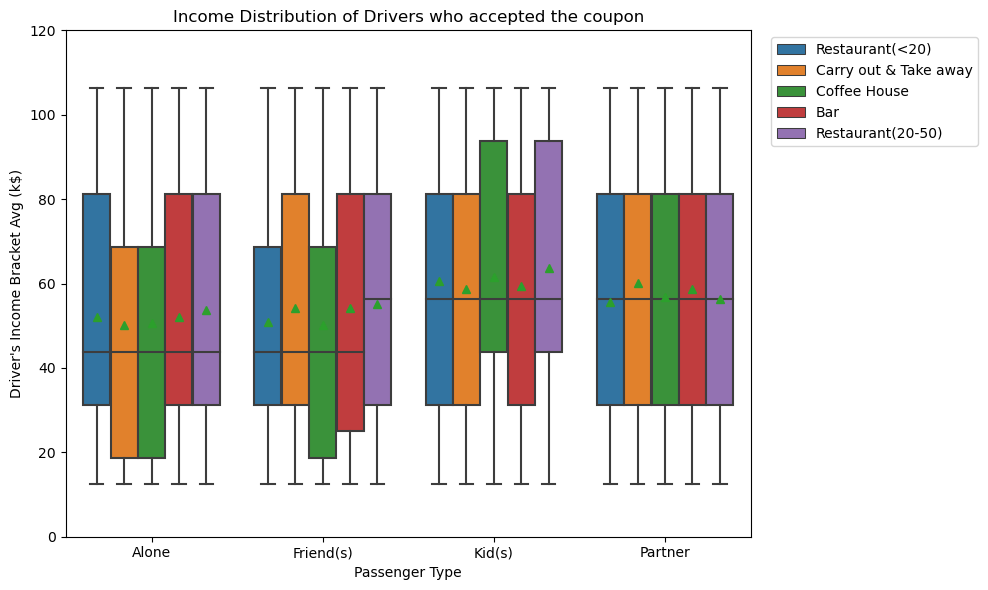

In [33]:
#Income analysis 
#converted income col. to int. assume salary bracket is 25k. 
#Replace with mean of the salary expressed as k$
plt.figure(figsize=(10,6))
plt.ylim(0,120)
sns.boxplot(x='Passenger', y='Income', hue="Coupon",showmeans=True,data=df.query("Y==1"))
txt ="Income Distribution of Drivers who accepted the coupon"
plt.title(txt)
plt.xlabel('Passenger Type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel("Driver's Income Bracket Avg (k$)")
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


Observation: To be used cautiously as the salary range is distilled to a single number
Overall, the graph suggests a possible association between passenger category and driver's income, with drivers who transport kids tending to have the highest average income and those who transport partners having the lowest. There may be a possible trend of decreasing income with increasing passenger category complexity based on the observation that the bars decrease in height from "Kid(s)" to "Partner". 

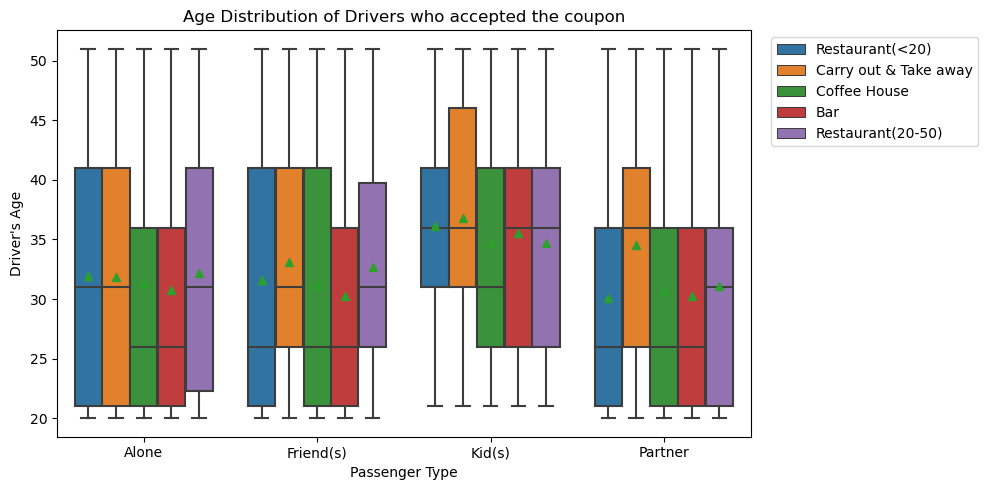

In [34]:

plt.figure(figsize=(10,5))

sns.boxplot(x='Passenger', y='Age', hue="Coupon",showmeans=True,data=df.query("Y==1"))
txt="Age Distribution of Drivers who accepted the coupon"
plt.title(txt)
plt.xlabel('Passenger Type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel("Driver's Age")
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


Drivers who transport alone or with friends have a similar average income. Drivers who transport kids or a partner have a higher average income than those who transport alone or with friends. There might not be a significant difference in income between drivers who transport kids and those who transport a partner. An association between passenger category and driver's income, with drivers who transport kids or a partner potentially having higher average income than those who transport alone or with friends.

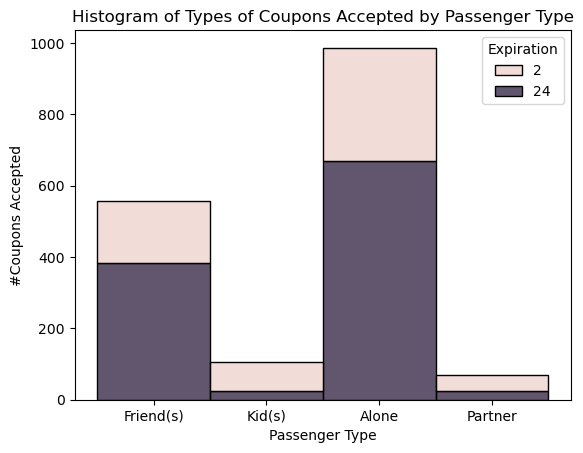

In [35]:
#consider drivers that accepted the Carry out & Take away
cof_df = df[df['Coupon'] == 'Carry out & Take away']
cof_df.head(3)

#evaluate which users 
sns.histplot(data=cof_df.query("Y==1"), hue='Expiration', x='Passenger', multiple='stack', stat='count') # for drivers that accepted coupon
# Customize the plot  
plt.title("Histogram of Types of Coupons Accepted by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel('#Coupons Accepted')
plt.show() 

#### insights
#Drivers who were alone accepted most number of coupons 
#In particular, for all cateogries cheaper resturants coupons were well accepted 



Coupon Acceptance Percentage based on Passenger type:
 Passenger
Alone        57.383721
Friend(s)    32.441860
Kid(s)        6.162791
Partner       4.011628
Name: count, dtype: float64


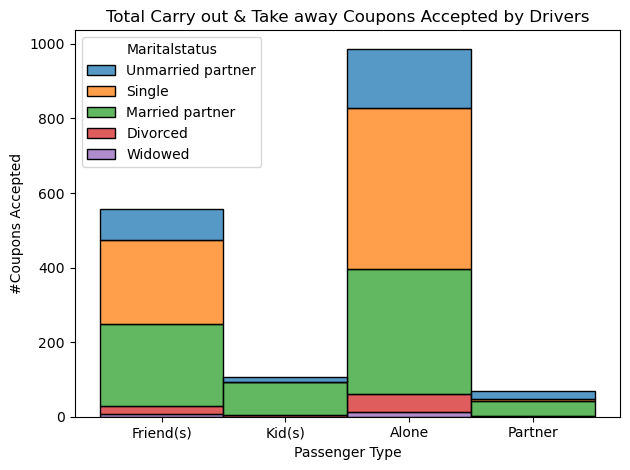

In [36]:
cof_df = df[(df['Coupon'] == 'Carry out & Take away') & (df['Y'] == 1) ]
print("Coupon Acceptance Percentage based on Passenger type:\n",100*cof_df['Passenger'].value_counts() / len(cof_df))

sns.histplot(data=cof_df, hue='Maritalstatus', x='Passenger', multiple='stack') # for entire population 

txt="Total Carry out & Take away Coupons Accepted by Drivers"
plt.title(txt)
plt.xlabel("Passenger Type")
plt.ylabel('#Coupons Accepted')
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)


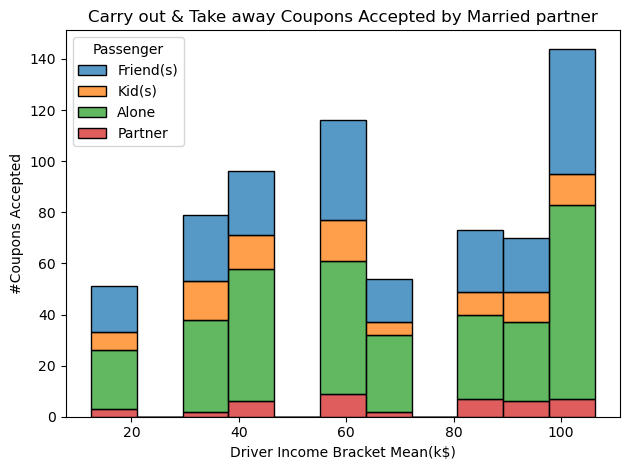

In [37]:
sns.histplot(data = df[(df['Coupon'] == 'Carry out & Take away') & (df['Y'] == 1) & (df["Maritalstatus"]== 'Married partner') ],
             x='Income', hue='Passenger', multiple='stack') # for entire population 
txt="Carry out & Take away Coupons Accepted by Married partner"
plt.title(txt)
plt.xlabel("Driver Income Bracket Mean(k$)")
plt.ylabel('#Coupons Accepted')
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

1. Income and coupon acceptance:
There is a positive correlation between driver income and the acceptance rate of carry-out and take-away coupons for both married and single individuals. As the driver's income bracket increases, the percentage of coupons accepted also appears to increase for both groups.
2. Married vs. single:
Overall, married partners seem to have a higher acceptance rate of carry-out and take-away coupons compared to single individuals across all income brackets. The lines representing married partners are consistently above the lines representing single individuals.
3. Income disparity in acceptance rate:
The difference in coupon acceptance rate between married and single individuals appears to be larger for lower income brackets and gradually narrows down for higher income brackets. This suggests that the income disparity in coupon acceptance between married and single individuals might be more pronounced at lower income levels.

Summary: 
Target audience:
Focus on drivers with higher income brackets: As their acceptance rate is generally higher, cater marketing efforts towards them.
Segment marketing campaigns based on marital status: Design separate campaigns for married and single individuals, considering their observed differences in coupon acceptance behavior. Emphasize different aspects of the coupons for each segment. 
For married couples, highlight might be the convenience and potential savings associated with carry-out and take-away options, which might be more relevant for families or busy schedules.
For single individuals, focus on the variety and affordability of dining options offered by the coupons, appealing to their potentially more price-sensitive preferences.


Coupon Acceptance Percentage based on Driver Age type:
 Age
21    20.465116
26    19.534884
31    15.813953
51    15.174419
36    10.755814
41     8.546512
46     5.058140
20     4.651163
Name: count, dtype: float64


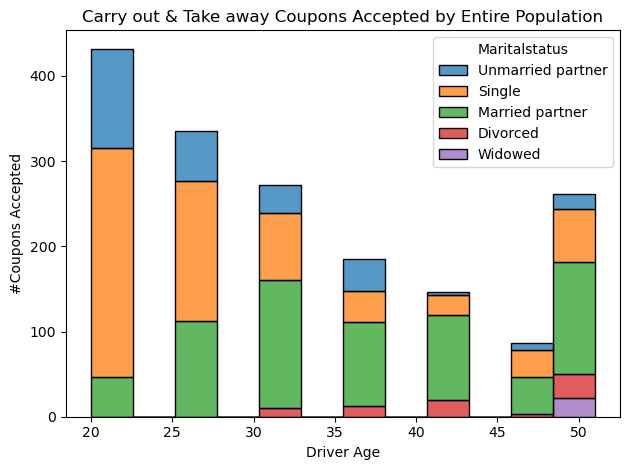

In [38]:
print("Coupon Acceptance Percentage based on Driver Age type:\n",100*cof_df['Age'].value_counts() / len(cof_df))

sns.histplot(data = df[(df['Coupon'] == 'Carry out & Take away') & (df['Y'] == 1)],
             x='Age', hue='Maritalstatus', multiple='stack') # for entire population 
txt="Carry out & Take away Coupons Accepted by Entire Population"
plt.title(txt)
plt.xlabel("Driver Age")
plt.ylabel('#Coupons Accepted')
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

Driver age and marital status trend:
Coupon acceptance increases with driver age, across all marital statuses. The increase in coupon acceptance with age might be steeper for married partners and singles compared to divorced drivers.  
Across most age groups, married partners tend to have the highest coupon acceptance rate, followed by single drivers, and then divorced drivers. The difference in coupon acceptance rate between married partners and other groups appears to be larger at younger ages and gradually narrows as drivers get older. The gaps between the lines are larger at younger ages and become smaller at older ages.
Possible explanations:
Age: As people age, their preferences and spending habits might change. Older drivers might be more likely to value the convenience and potential savings offered by carry-out and take-away options, leading to a higher acceptance rate.
Marital status: Married couples might have different dining habits and financial considerations compared to single individuals or divorced individuals. They might be more likely to use coupons to save money on meals or to simplify meal planning.

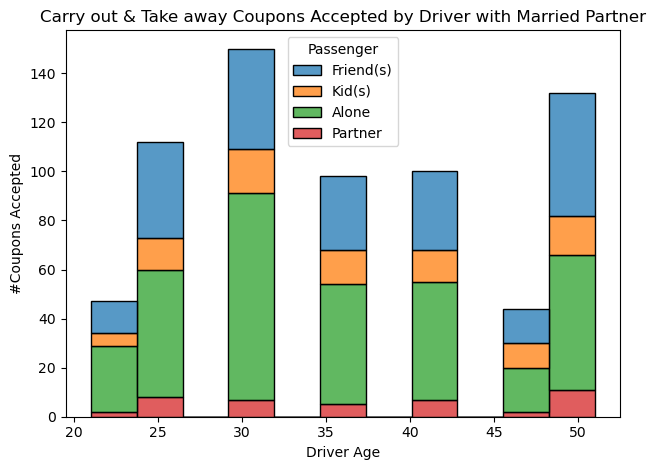

In [39]:
sns.histplot(data = df[(df['Coupon'] == 'Carry out & Take away') & (df['Y'] == 1) & (df["Maritalstatus"]== 'Married partner') ],
             x='Age', hue='Passenger', multiple='stack')  # for married couple 
txt="Carry out & Take away Coupons Accepted by Driver with Married Partner"
plt.title(txt)
plt.xlabel("Driver Age")
plt.ylabel('#Coupons Accepted')
plt.tight_layout()
file_format=".png"   # Change the filename and format as needed
image_filename = txt+file_format
image_path = os.path.join(images_dir, image_filename)
plt.savefig(image_path)

Age and Coupon Acceptance: Coupon acceptance appears to increase with driver age across all passenger categories.  
Passenger Type and Coupon Acceptance: Drivers who transport family (kids) tend to accept more coupons compared to drivers who transport friends or who drive alone. Drivers who drive alone tend to have the lowest coupon acceptance rate across all age groups. The difference in coupon acceptance between drivers who transport family and those who transport friends appears to be larger at younger ages and gradually narrows as drivers get older. Hypothesis: 
Age: As people age, their preferences and spending habits might change. Older drivers might be more likely to value the convenience and potential savings offered by carry-out and take-away options, leading to a higher acceptance rate.
Passenger type: Drivers who transport families, especially those with children, might have different dining needs and preferences compared to those who drive alone or with friends. They might be more likely to use coupons to find convenient and budget-friendly meal options that cater to the whole family.

Summary: A possible association between driver age, passenger type, and the acceptance rate of carry-out and take-away coupons. Drivers who transport families tend to have a higher coupon acceptance rate compared to those who transport friends or drive alone. Additionally, coupon acceptance seems to increase with driver age across all passenger categories. 